In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
airlines_data = pd.read_csv("../datasets/airlines.csv")
airlines_data["Month"] = pd.to_datetime(airlines_data["Month"])
airlines_data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<Axes: xlabel='Month', ylabel='Passengers'>

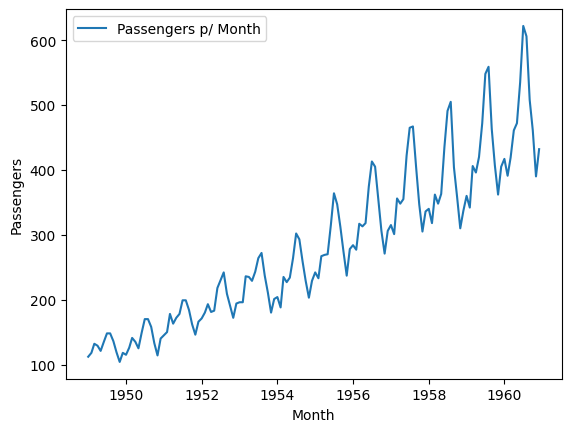

In [13]:
sns.lineplot(data=airlines_data,x="Month",y="Passengers", label="Passengers p/ Month")

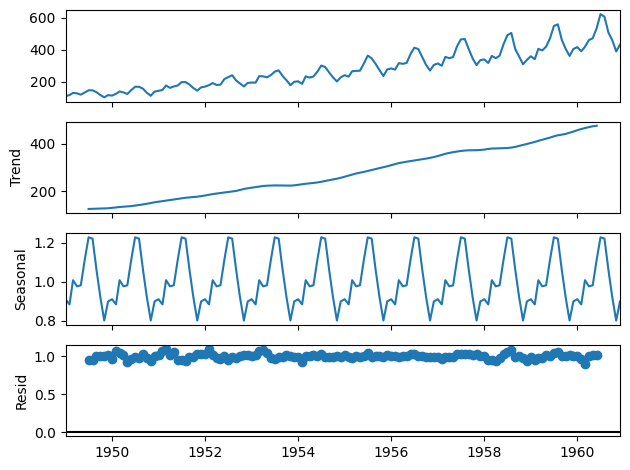

In [30]:
series = pd.read_csv("../datasets/airlines.csv", header=0, index_col=0, parse_dates=True)
result = seasonal_decompose(series, model="multiplicative")
result.plot()
plt.show()

In [38]:
import statsmodels.api as sm

train_series = series[:-12]
test_series = series[-12:]

model = sm.tsa.SARIMAX(
    train_series,
    order = (0,0,1),
    seasonal_order = (0,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False)
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78274D+00    |proj g|=  2.54736D-01

At iterate    5    f=  3.72390D+00    |proj g|=  4.53609D-02

At iterate   10    f=  3.59701D+00    |proj g|=  4.92216D-02

At iterate   15    f=  3.59460D+00    |proj g|=  3.03180D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   3.032D-07   3.595D+00
  F =   3.5945957522570353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/guilherme/anaconda3/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/guilherme/anaconda3/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -474.487
Date:                            Wed, 05 Nov 2025   AIC                            954.973
Time:                                    17:44:11   BIC                            962.964
Sample:                                01-01-1949   HQIC                           958.212
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6953      0.075      9.318      0.000       0.549       0.842
ma.S.L12       0.3844      0.126      3.062      0.002       0.138       0.630
sigma2       451.0990     76.550      5.893      0.000     301.063     601.135
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.96   Prob(JB):                         0.93
Heteroskedasticity (H):               1.36   Skew:                             0.02
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
forecast_obj = result.get_forecast(steps=12)
forecast_mean = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int(alpha=0.05)

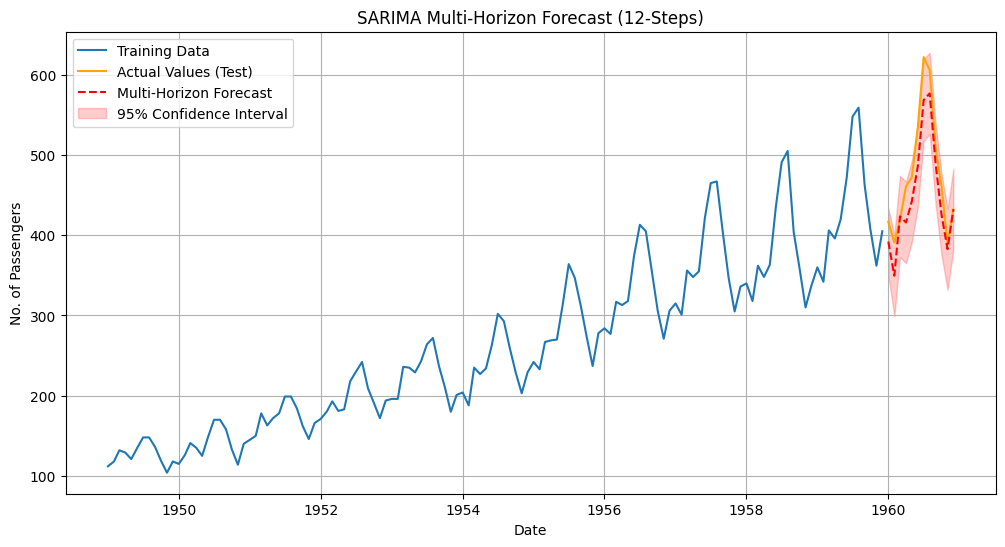

In [41]:

plt.figure(figsize=(12, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series, label='Actual Values (Test)', color='orange')
plt.plot(forecast_mean, label='Multi-Horizon Forecast', linestyle='--', color='red')

# Shade the confidence interval
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0], # Lower bound
    conf_int.iloc[:, 1], # Upper bound
    color='red',
    alpha=0.2,
    label='95% Confidence Interval'
)
plt.title('SARIMA Multi-Horizon Forecast (12-Steps)')
plt.xlabel('Date')
plt.ylabel('No. of Passengers')
plt.legend()
plt.grid(True)
plt.show()